Steg 1:
Det vi har börjat med är att vi har importerat CSV-filen i VS Code och sedan läst in filen med pandas.read_csv och eftersom filen är semikolon sepererad så har vi använt sep=";" Vi kan se att det finns 10 000 rader i varje kolumn, 10 kolumner och inga nollvärden etc. (Vi får finslipa texterna, detta är bara liten start)

In [1]:
#Grundläggande datahantering och matematiska operationer
import numpy as np
import pandas as pd

#Visualisering
import matplotlib.pyplot as plt
import seaborn as sns  

#Dela upp data
from sklearn.model_selection import train_test_split, GridSearchCV

#Förbehandling av data
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

#Modeller
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor

#Utvärdering
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

df = pd.read_csv("car_price_dataset.csv", sep=";")


# 2. Datafördelning

Vi delar inte upp träningsset i tränings- och valideringsset eftersom vi kommer använda cross-validation senare.
Vi följer praxis och har en fördelning på 80-20 enligt Cross Validation standard.

In [2]:
# Delar upp i X och y
X = df.drop("Price", axis=1)
y = df["Price"]

# Delar upp i (hel)tränings- och 20% testset
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# Skapa en EDA-dataframe 
EDA_train_df = X_train_full.copy()
EDA_train_df["Price"] = y_train_full

print(EDA_train_df.head()) #visar de första raderna i datan
print(EDA_train_df.shape)  #kollar storlek på rader och kolumner
print(EDA_train_df.info()) # kontrollerar kolumner och datatyper

           Brand     Model  Year  Engine_Size Fuel_Type    Transmission  \
9254  Volkswagen      Golf  2007          3.2    Hybrid  Semi-Automatic   
1561         BMW  5 Series  2010          4.8  Electric  Semi-Automatic   
1670     Hyundai    Sonata  2006          1.9    Hybrid  Semi-Automatic   
6087       Honda      CR-V  2019          1.7    Diesel  Semi-Automatic   
6669    Mercedes   E-Class  2005          3.6    Petrol       Automatic   

      Mileage  Doors  Owner_Count  Price  
9254    33948      5            4   9721  
1561   224853      2            1   9402  
1670    13435      3            5   8531  
6087   199846      2            3   7503  
6669      261      3            2  10694  
(8000, 10)
<class 'pandas.DataFrame'>
Index: 8000 entries, 9254 to 7270
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         8000 non-null   str    
 1   Model         8000 non-null   str    
 2   Year     

# 3. EDA

3.1 Deskriptiv statistik

In [3]:
print(EDA_train_df.describe()) # Medelvärde, median, min/max, standardavvikelse
print()
print(EDA_train_df['Brand'].value_counts()) # Antal unika värden i kategoriska kolumner. Kan också visualiseras med tex ett stapeldiagram. 
print()
print(EDA_train_df['Model'].value_counts()) # Antal unika värden i kategoriska kolumner. Kan också visualiseras med tex ett stapeldiagram. 
print()
print(EDA_train_df['Fuel_Type'].value_counts()) # Antal unika värden i kategoriska kolumner. Kan också visualiseras med tex ett stapeldiagram. 
print()
print(EDA_train_df['Transmission'].value_counts()) # Antal unika värden i kategoriska kolumner. Kan också visualiseras med tex ett stapeldiagram. 
print()
print("Amount of brands:", EDA_train_df['Brand'].nunique()) # Antal unika bilar i datasetet
print("Amount of models:", EDA_train_df['Model'].nunique()) # Antal unika modeller i datasetet

              Year  Engine_Size        Mileage        Doors  Owner_Count  \
count  8000.000000  8000.000000    8000.000000  8000.000000  8000.000000   
mean   2011.520375     2.996887  149477.003250     3.503625     2.991875   
std       6.897792     1.153237   86613.284937     1.111482     1.420849   
min    2000.000000     1.000000      25.000000     2.000000     1.000000   
25%    2006.000000     2.000000   74192.250000     3.000000     2.000000   
50%    2012.000000     3.000000  150069.500000     4.000000     3.000000   
75%    2017.000000     4.000000  224292.750000     4.000000     4.000000   
max    2023.000000     5.000000  299947.000000     5.000000     5.000000   

              Price  
count   8000.000000  
mean    8828.745250  
std     3132.164285  
min     2000.000000  
25%     6604.750000  
50%     8829.000000  
75%    11071.000000  
max    18301.000000  

Brand
Audi          851
Volkswagen    828
Ford          826
Hyundai       818
Honda         807
Chevrolet     799
BM

3.2 Visualisering


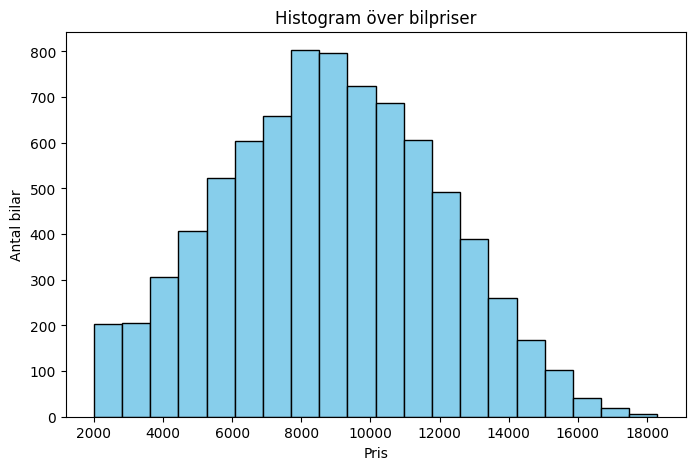

In [4]:
# Histogram över bilpriser

plt.figure(figsize=(8,5))
plt.hist(EDA_train_df['Price'], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram över bilpriser")
plt.xlabel("Pris")
plt.ylabel("Antal bilar")
plt.show()

# Visar på form på fördelning: Symmetrisk (normalfördelad), skev åt höger, skev åt vänster

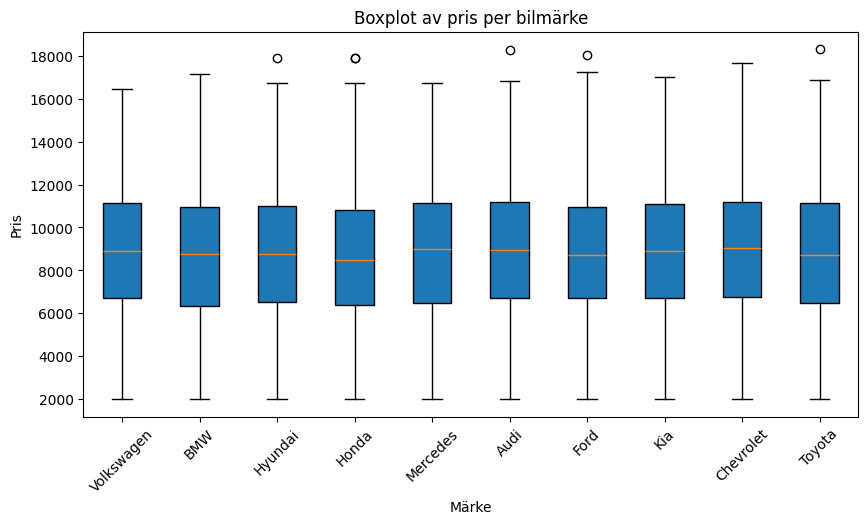

In [5]:
plt.figure(figsize=(10,5))
brands = EDA_train_df['Brand'].unique()
data_to_plot = [EDA_train_df[EDA_train_df['Brand']==brand]['Price'] for brand in brands]

plt.boxplot(data_to_plot, tick_labels=brands, patch_artist=True)
plt.title("Boxplot av pris per bilmärke")
plt.xlabel("Märke")
plt.ylabel("Pris")
plt.xticks(rotation=45)
plt.show()
# Identifiera outliers som är relativa till gruppen, inte hela datan.


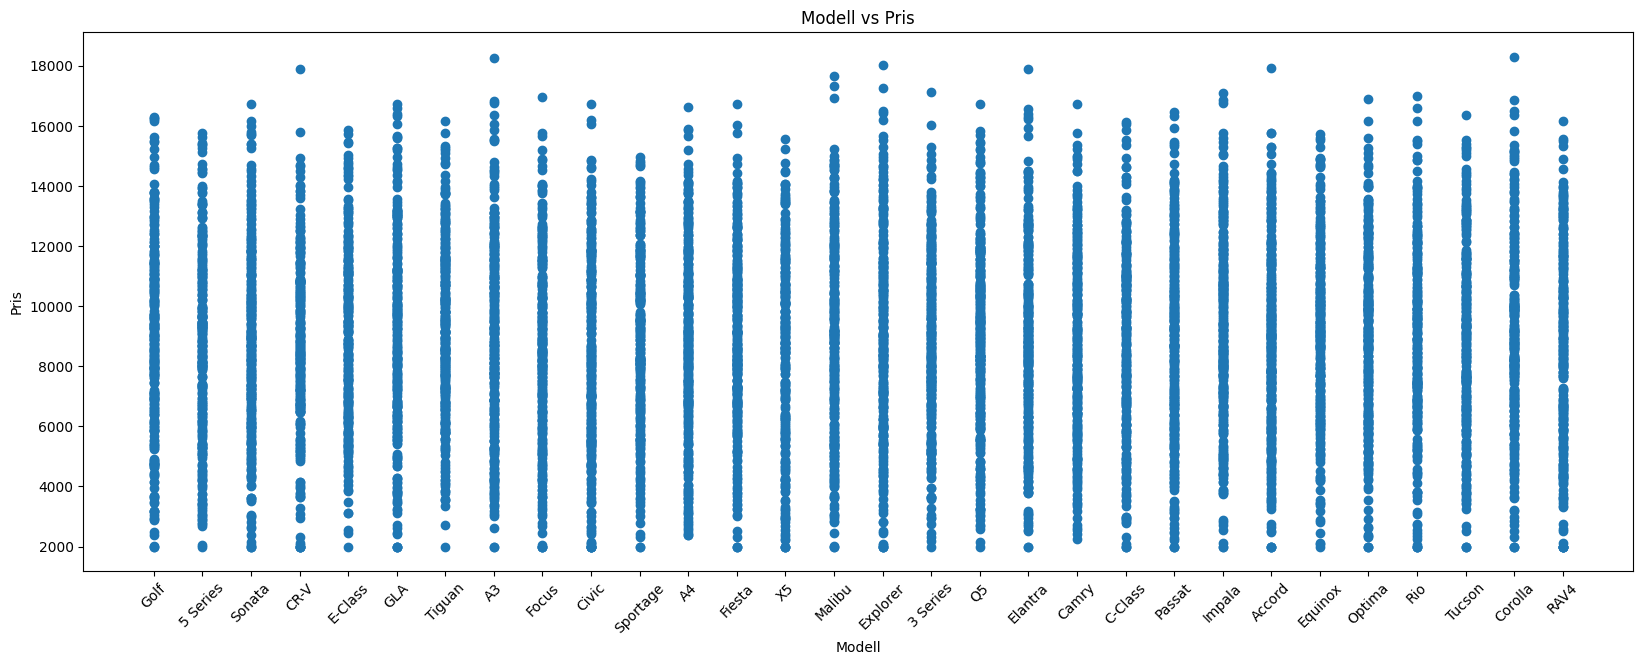

In [6]:

plt.figure(figsize=(20,7))

plt.scatter(EDA_train_df['Model'], EDA_train_df['Price'])
plt.xlabel("Modell")
plt.ylabel("Pris")
plt.xticks(rotation=45)
plt.title("Modell vs Pris")
plt.show()

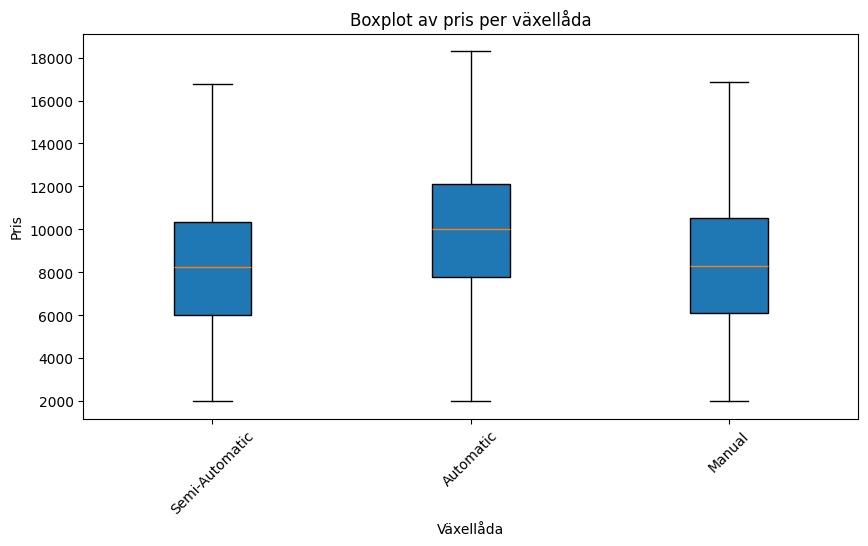

In [7]:
plt.figure(figsize=(10,5))
transmission = EDA_train_df['Transmission'].unique()
data_to_plot = [EDA_train_df[EDA_train_df['Transmission']==t]['Price'] for t in transmission]

plt.boxplot(data_to_plot, tick_labels=transmission, patch_artist=True)
plt.title("Boxplot av pris per växellåda")
plt.xlabel("Växellåda")
plt.ylabel("Pris")
plt.xticks(rotation=45)
plt.show()
# Identifiera outliers som är relativa till gruppen, inte hela datan.

Korrelationsmatrisen visar sambanden mellan de numeriska variablerna i datasetet. Resultaten indikerar att bilpriset har en stark positiv korrelation med tillverkningsår (Year), vilket innebär att nyare bilar generellt har högre priser. Det finns även en måttlig positiv korrelation mellan motorstorlek (Engine Size) och pris. Samtidigt observeras en tydlig negativ korrelation mellan körsträcka (Mileage) och pris, vilket tyder på att bilar med högre körsträcka tenderar att ha lägre värde. Övriga variabler uppvisar svaga eller obetydliga samband med priset.


Kort sammanfattning: Baserat på den explorativa dataanalysen valdes Year, Mileage och Engine Size som numeriska variabler, då dessa uppvisade tydliga samband med priset. De kategoriska variablerna Fuel_Type och Transmission inkluderades eftersom de har ett begränsat antal kategorier och förväntas påverka bilpriset. 

Owner_Count och Doors bör exkluderas på grund av låg korrelation med målvariabeln.

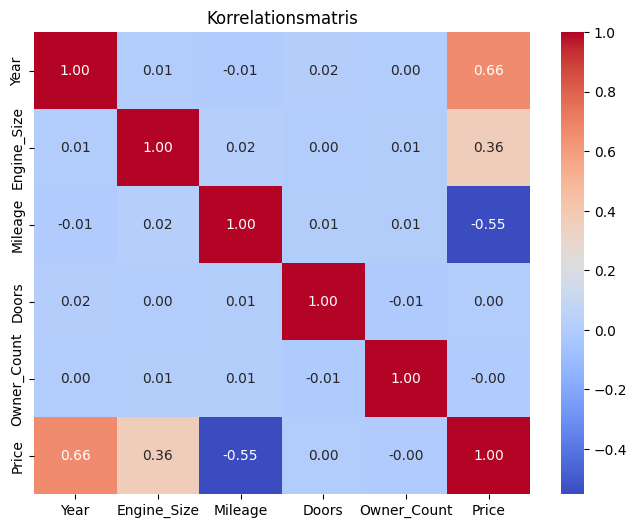

In [8]:
# Korrelationsmatris

plt.figure(figsize=(8,6))
sns.heatmap(EDA_train_df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Korrelationsmatris")
plt.show()

Innan modellen tränas förbehandlas datan för att kunna användas i maskininlärningsmodeller. Numeriska variabler hanteras genom att saknade värden ersätts med medianvärdet, medan kategoriska variabler omvandlas till numeriska värden med hjälp av One-Hot Encoding. Förbehandlingen anpassas endast på träningsdatan och appliceras därefter på validerings- och testdata för att undvika dataläckage.

Kategoriska variabler omvandlas till numeriska representationer med hjälp av One-Hot Encoding, där varje kategori kodas som en binär variabel. För att modellen ska kunna hantera kategorier som eventuellt endast förekommer i validerings- eller testdatan används inställningen handle_unknown="ignore".

Dessa förbehandlingssteg kombineras med hjälp av en ColumnTransformer, vilket möjliggör att olika transformationer appliceras på olika typer av variabler inom samma pipeline. Förbehandlingen anpassas (fit) endast på träningsdatan och appliceras därefter på validerings- och testdatan, vilket säkerställer att ingen information från framtida data läcker in i träningsprocessen. Slutligen resulterar förbehandlingen i en numerisk funktionsmatris som kan användas direkt av modellen.

# 4. Bearbeta data

I datan finns inga tomma värden.
Outliers välver vi att ha med, eftersom de är förhållandevis nära resten av datasetet.
Vi omvandlar däremot kategoriska värden med OneHotEncoder.

In [9]:
num_cols = ['Year', 'Engine_Size', 'Mileage']
cat_cols = ['Fuel_Type', 'Transmission', 'Brand', 'Model']  

ohe_eda = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
cat_encoded = ohe_eda.fit_transform(EDA_train_df[cat_cols])  # FIT ENDAS på TRAIN!

eda_numeric = EDA_train_df[num_cols]
eda_full = pd.DataFrame(cat_encoded, columns=ohe_eda.get_feature_names_out(), index=EDA_train_df.index)
eda_full = pd.concat([eda_numeric, eda_full, EDA_train_df['Price']], axis=1)

corr = eda_full.corr()

# 5. Modellering

Motivering av modellval:

Vi har valt att arbeta med tre modeller: LinearRegression, Ridge och RandomForest. 

LinearRegression fungerar som vår baseline-modell och ger oss en enkel referenspunkt genom att anta linjära samband mellan features och bilpris. 

Ridge bygger vidare på detta genom att lägga till L2-regularisering, vilket förhindrar överanpassning när vi har många features efter OneHotEncoding. Detta gör Ridge mer robust än vanlig linjär regression. 

RandomForest representerar en helt annan modellkategori baserad på beslutträd istället för linjära ekvationer. Som en ensemble-metod kan den fånga icke-linjära samband och komplexa interaktioner mellan variabler som de linjära modellerna missar. RandomForest är också robust mot outliers och behöver mindre förbehandling av data. Tillsammans ger dessa tre modeller oss en progression från enkel till avancerad modellering, samtidigt som de täcker både linjära och icke-linjära metoder. Alla tre modeller är etablerade inom maskininlärning och rekommenderas i kurslitteraturen för regressionsproblem.

Pipeline med OneHotEncoder för våra modeller

In [10]:

# Preprocessor (återanvänd!)
preprocessor = ColumnTransformer(
    [('cat', ohe_eda, cat_cols)],  # cat_cols från EDA
    remainder='passthrough'       # Numeriska kolumner oförändrade
)

# 1. Pipeline för LINJÄR REGRESSION
lr_pipe = Pipeline([
    ('preproc', preprocessor),
    ('model', LinearRegression())
])

# 2. Pipeline för RIDGE (regularisering mot overfitting)
ridge_pipe = Pipeline([
    ('preproc', preprocessor),
    ('model', Ridge(alpha=1.0))  # alpha styr regularisering
])

# 3. Pipeline för RANDOM FOREST (non-linjär, bäst ofta på car prices)
rf_pipe = Pipeline([
    ('preproc', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=100,    # Trädantal
        max_depth=10,        # Djup mot overfitting
        random_state=42      # Reproducerbart
    ))
])



Hyperparameter-tuning med GridSearchCV

In [11]:
# 1. LINJÄR (ingen tuning, men CV fr RMSE-baslinje)

lr_grid = GridSearchCV(lr_pipe, {}, cv=5, scoring='neg_root_mean_squared_error')
lr_grid.fit(X_train_full, y_train_full)
print("Linjär CV RMSE:", -lr_grid.best_score_)

# 2. RIDGE (tunar alpha mot overfitting)

ridge_grid = GridSearchCV(ridge_pipe, {'model__alpha': [0.01, 0.1, 1.0, 10.0]}, cv=5, scoring='neg_root_mean_squared_error')
ridge_grid.fit(X_train_full, y_train_full)
print("Ridge CV RMSE:", -ridge_grid.best_score_)
print("Bästa alpha:", ridge_grid.best_params_)

# 3. RANDOM FOREST (tunar träd & djup)

rf_param_grid = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [10, None]
}
rf_grid = GridSearchCV(rf_pipe, rf_param_grid, cv=5, scoring='neg_root_mean_squared_error')
rf_grid.fit(X_train_full, y_train_full)
print("RF CV RMSE:", -rf_grid.best_score_)
print("Bästa params:", rf_grid.best_params_)

Linjär CV RMSE: 89.06270785806586


c:\Users\tommi_bdmz4mu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:228: LinAlgWarning: An ill-conditioned matrix detected: slice 0 has rcond = 1.295279047447416e-16.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\tommi_bdmz4mu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:228: LinAlgWarning: An ill-conditioned matrix detected: slice 0 has rcond = 1.310984873555587e-16.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\tommi_bdmz4mu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:228: LinAlgWarning: An ill-conditioned matrix detected: slice 0 has rcond = 1.3037243187622218e-16.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\tommi_bdmz4mu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:228: LinAlgWarning: An ill-conditioned matrix detected: sli

Ridge CV RMSE: 89.06281128090498
Bästa alpha: {'model__alpha': 0.01}
RF CV RMSE: 587.2600431008718
Bästa params: {'model__max_depth': None, 'model__n_estimators': 100}


In [12]:
models = {'Linjär': lr_grid.best_estimator_, 'Ridge': ridge_grid.best_estimator_, 'RF': rf_grid.best_estimator_}
for name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name} Test RMSE: {rmse:.2f}")


Linjär Test RMSE: 64.91
Ridge Test RMSE: 64.92
RF Test RMSE: 543.76
